In [1]:
import os
import sys
sys.path.append("../")
import serial
import callisto
import subprocess
import shlex
import socket

## Managing Callisto

Instantiate the classes to handle callisto spectrometer and its calibration unit. Check the code to see possible parameters, they are fairly customizable.

In [2]:
cal_unit = callisto.CalibrationUnit(tty="/dev/ttyACM0")
Callisto = callisto.Callisto(PORT=6789, cal_unit=cal_unit)

In [ ]:
Callisto.get_ip().IP
Callisto.get_PID()
Callisto.cal_unit.check()
Callisto.stop()
Callisto.run_daemon(action="stop")
Callisto.run("WARM")
Callisto.do("overview")
Callisto.record_ovs("COLD")
Callisto.record_fits("HOT")

Process Process-3:
Traceback (most recent call last):
  File "/home/bingo/.conda/envs/SDR/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/bingo/.conda/envs/SDR/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/bingo/clones/callisto/docs/../callisto.py", line 43, in run_command
    process = subprocess.Popen(
  File "/home/bingo/.conda/envs/SDR/lib/python3.9/subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "/home/bingo/.conda/envs/SDR/lib/python3.9/subprocess.py", line 1821, in _execute_child
    raise child_exception_type(errno_num, err_msg, err_filename)
FileNotFoundError: [Errno 2] No such file or directory: 'stop'
[2022-04-17 13:46:58] Loaded schedule is empty
[2022-04-17 13:47:03] Loaded schedule is empty
[2022-04-17 13:48:06] Loaded schedule is empty


In [6]:
Callisto._calibrate("HOT")

[2022-04-17 11:21:06] Loaded schedule is empty
[2022-04-17 11:22:07] Loaded schedule is empty


In [29]:
Callisto.calibrate()

[2022-04-17 13:19:25] Loaded schedule is empty
[2022-04-17 13:20:27] Loaded schedule is empty
[2022-04-17 13:22:12] Loaded schedule is empty
[2022-04-17 13:23:15] Loaded schedule is empty
[2022-04-17 13:24:59] Loaded schedule is empty
[2022-04-17 13:26:02] Loaded schedule is empty


## Visualizando

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
df1 = pd.read_table("/opt/callisto/Ovs/OVS_UIRAPURU_20220417_162509.prn", sep=";")
df1.columns = ["Frequency[MHz]", "S[mV]"]
df2 = pd.read_table("/opt/callisto/Ovs/OVS_UIRAPURU_20220417_162222.prn", sep=";")
df2.columns = ["Frequency[MHz]", "S[mV]"]
df3 = pd.read_table("/opt/callisto/Ovs/OVS_UIRAPURU_20220417_161935.prn", sep=";")
df3.columns = ["Frequency[MHz]", "S[mV]"]

df1["Frequency[MHz]"] = 1760 - df1["Frequency[MHz]"]
df2["Frequency[MHz]"] = 1760 - df2["Frequency[MHz]"]
df3["Frequency[MHz]"] = 1760 - df3["Frequency[MHz]"]

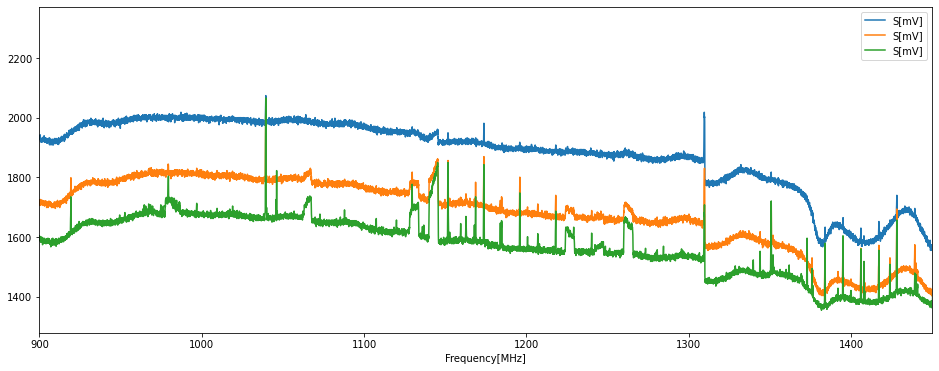

In [43]:
fig, ax = plt.subplots(figsize = (16,6))
df1.plot("Frequency[MHz]", "S[mV]", ax = ax)
df2.plot("Frequency[MHz]", "S[mV]", ax = ax)
df3.plot("Frequency[MHz]", "S[mV]", ax = ax)
ax.set_xlim([900, 1450])
plt.show();

In [44]:
from astropy.io import fits
import numpy as np
hdul_3 = fits.open("/opt/callisto/data/UIRAPURU_20220417_162612_03.fit")
hdul_2 = fits.open("/opt/callisto/data/UIRAPURU_20220417_162325_02.fit")
hdul_1 = fits.open("/opt/callisto/data/UIRAPURU_20220417_162037_01.fit")
hdul_0 = fits.open("/opt/callisto/data/UIRAPURU_20220417_162754_59.fit")
data = np.hstack([hdul_1[0].data, hdul_2[0].data, hdul_3[0].data, hdul_0[0].data])
df = pd.DataFrame(data)

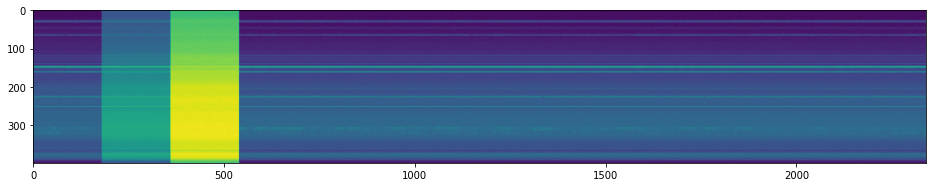

In [45]:
fig, ax = plt.subplots(figsize = (16,6))
plt.imshow(df)
plt.show();

## Logging testing ground

In [ ]:
# create logger
logger = logging.getLogger('callisto')
logger.setLevel(logging.DEBUG)
# create formatter



# create console handler and set level to debug
ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
# add formatter to ch
ch.setFormatter(formatter)
# add ch to logger
logger.addHandler(ch)

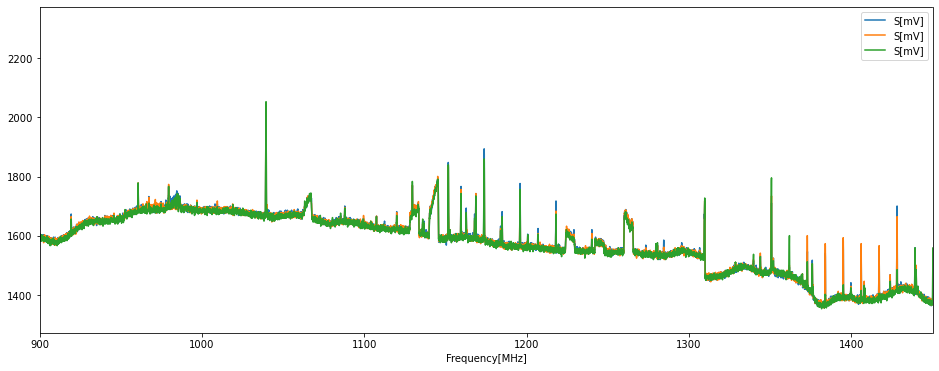

In [2]:
df1 = pd.read_table("../data/OVS_UIRAPURU_20220417_195421.prn", sep=";")
df1.columns = ["Frequency[MHz]", "S[mV]"]
df2 = pd.read_table("../data/OVS_UIRAPURU_20220417_193748.prn", sep=";")
df2.columns = ["Frequency[MHz]", "S[mV]"]
df3 = pd.read_table("../data/OVS_UIRAPURU_20220417_191836.prn", sep=";")
df3.columns = ["Frequency[MHz]", "S[mV]"]

df1["Frequency[MHz]"] = 1760 - df1["Frequency[MHz]"]
df2["Frequency[MHz]"] = 1760 - df2["Frequency[MHz]"]
df3["Frequency[MHz]"] = 1760 - df3["Frequency[MHz]"]
fig, ax = plt.subplots(figsize = (16,6))
df1.plot("Frequency[MHz]", "S[mV]", ax = ax)
df2.plot("Frequency[MHz]", "S[mV]", ax = ax)
df3.plot("Frequency[MHz]", "S[mV]", ax = ax)
ax.set_xlim([900, 1450])
plt.show();